# Mehrunisa Qayyum @pitaconsumer | Capstone 4 Project: NLP | Mentor: Tiago Fassoni

## What is the problem you are attempting to solve?
I intend to make a business case for flagging toxic content by addressing the problem of political ad toxicity and veracity by comparing two popular social media platforms: Facebook and Twitter.  Specifically, we could use the test case of ‘race’ and its context: is ‘race’ used more semantically regarding ‘elections’, or the political sphere, than in the semantic area of ‘social relations’? 

## How is your solution valuable?
The New York Times held a contest to identify ways to detect ‘fake news’. Recently, Twitter introduced a tool to flag tweets’ veracity and offer resources to learn more about possible misinformation within the tweet. Similarly, Reddit addressed this problem of racist tweets in a political context by identifying Pro-Trump groups inciting racism. Facebook is facing a similar challenge and identifying ways to flag without losing political ad revenue.

## What is your data source and how will you access it?
I will need to utilize two data sources to review both platforms. My data source is utilizing a Kaggle database compiled by Propublica users whose browsers collected Facebook ads and sent to servers. The Twitter data set will draw from my approved Developer application to access Twitter API. 

## What techniques from the course do you anticipate using?
We will rely on Natural Language Processing techniques to conduct textual analysis. We will need to import: spaCy, NLTK, and maybe Scikit Learn if we resort to creating pipelines to compare Facebook messages to Tweets. We will use NLTK to preprocess Facebook messages and Tweets as data observations.

Once we identify the top words through Bag of Words, we will look for correlate their use with the word “race” and related themes. Using these words, we could  use Word2Vec on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.
  
Simultaneously, we could use a Decision Tree Classifier used to classify tweets as ‘political’ in dataset since the Facebook Ads dataset already classified what is political. 

## What do you anticipate to be the biggest challenge you’ll face?

The biggest challenges include: 1) sorting through characters, like #, as well as words borrowed from other languages; 2) recounting all race controversies to sort through message and tweet content; as well as 3) quantifying the amount of revenue lost in political ads if we focus on the racial theme. 

In [25]:
import preprocessor
from textblob import TextBlob
import statistics
from typing import List

import pandas as pd
import numpy as np
import scipy

import spacy
import nltk
import re

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
!pip install wordcloud

     |████████████████████████████████| 163kB 597kB/s eta 0:00:01


In [17]:
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [7]:
#fb = pd.read_csv('/⁨Users⁩/⁨mehrunisaqayyum⁩/Downloads⁩/work/fbpac-ads-en-US.csv')


fb = pd.read_csv('/Users/mehrunisaqayyum/Downloads/work/fbpac.csv')
fb

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [8]:
fb.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [14]:
fb.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              object
message                            object
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        object
targetedness                      float64
listbuilding_fundraising_proba    

### Observation: We have columns like "political", 'not_political', 'title' and 'message' of the advertisement; 'created at'; 'lang' for languages; 'political_probabilty', and 'paid_for_by'.

In [34]:
fb.describe()

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
count,162324.000000,162324.000000,162324.000000,162324.000000,112747.000000,152394.000000
mean,4.177663,0.794214,4.605049,0.928099,3.939723,0.545964
std,10.574403,2.770883,40.689815,0.169513,1.758957,0.333821
min,0.000000,0.000000,0.000000,0.000079,0.000000,0.000091
25%,0.000000,0.000000,1.000000,0.951812,3.000000,0.265190
50%,1.000000,0.000000,1.000000,0.997825,4.000000,0.423612
75%,4.000000,1.000000,2.000000,0.999978,4.000000,0.999893
max,488.000000,330.000000,3575.000000,1.000000,12.000000,1.230622


## Descriptive Statistics: Average Dollars Spent on Facebook Ads
From another dataset.

In [32]:
click_count_per_add = fb.Clicks.sum()/fb.Clicks.count()
click_ratio = (fb.AdSpend.sum()/63)/fb.Clicks.count()
ad_spend_count_ratio = (fb.AdSpend.sum()/63)/fb.Clicks.count()
print('Total number of Ads purcheased by IRA from 2015 to 2017: ', fb.Clicks.count())
print('Total dollar spent by IRA from 2015 to 2017: ${:.2f}'.format(fb.AdSpend.sum()/63))
print('Average cost per Ad: ${:.2f}'.format(ad_spend_count_ratio))
print('Average number of clicks per Ad: {:.2f}'.format(click_count_per_add))
print('Avg cost per click: ${:.2f}'.format(click_ratio))

AttributeError: 'DataFrame' object has no attribute 'Clicks'

In [11]:
fe = ['title','message','paid_for_by']
text_fb = fb[fe]
text_fb.head(-10)

,title,message,paid_for_by
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,League of Conservation Voters
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,Indivisible Project
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,International Rescue Committee
3,Covenant House International,<p>What more can you do in the final hours of ...,Covenant House International
4,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",Planned Parenthood Federation of America
...,...,...,...
162309,AFT - American Federation of Teachers,<p>Mike DeWine was elected as Ohio’s attorney ...,"AFT - American Federation of Teachers, not aut..."
162310,MoveOn,<p>We resisted and won control of the House! N...,"MoveOn.org Political Action, pol.moveon.org, n..."
162311,AAAS - The American Association for the Advanc...,"<p>Diversity in science, technology, and engin...",NaN
162312,Nathan Fletcher for County Supervisor 2018,"<p>As Supervisor, I will stand up to the polit...",Nathan Fletcher for Supervisor 2018


### Observation
We see that we have 162,314 records of political ad data on Facebook. The last ten sample how ads were purchased by nonpartisan groups, like "League of Conservation Voters", political organizer groups, like "Indivisible Project", unions "AFT", and international nonprofits like "International Rescue Committee". 


In [ ]:
## Identify Stop Words

In [18]:
stop=set(stopwords.words('english'))

def build_list(fb,col="title"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= fb[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

In [21]:
corpus=build_list(text_fb)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

Text(0.5, 1.0, 'most common word in title')

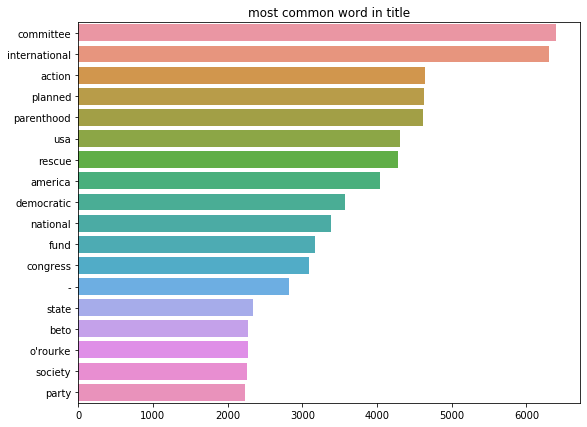

In [22]:
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in title")

### Observations:
Top 5 most common words are ranked:
    1) 'Committee'
    2)'International'
    3) 'Action' and 'Planned'
    4) 'Parenthood'
    
USA and 'America' are interchangeable--so maybe these are double-counting. 

'Democratic' not used as much as nonpolitical word of 'rescue'. However, we do not see 'Republican' or 'GOP'. 

'Beto' and'O'Rourke' are occuring at same rate. This is the only person to show up in this political ad data set. 

## Most Common 'Paid For By'

Text(0.5, 1.0, "Most Common Word in 'paid_for_by'")

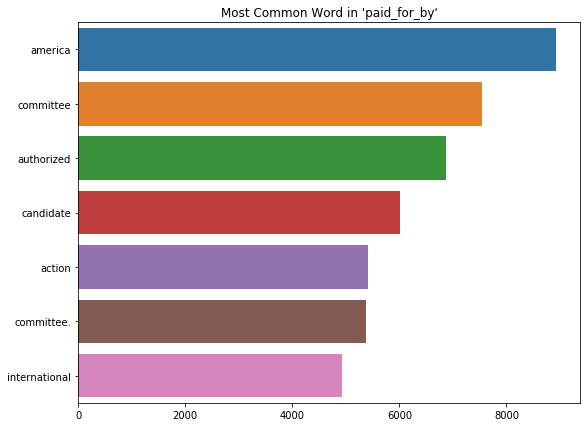

In [23]:
corpus=build_list(text_fb,"paid_for_by")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("Most Common Word in 'paid_for_by'")

In [ ]:
### 

In [26]:
def plot_count(feature, title,fb, size=1, show_percents=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 4))
    total = float(len(fb))
    g = sns.countplot(fb[feature],order = fb[feature].value_counts().index[0:20], palette='Set3')
    g.set_title("Number of {}".format(title))
    if (size > 2):
        plt.xticks(rotation=90, size=10)
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                   height + 3, '{:1.2f}%'.format(100*height/total),
                   ha="center")
    ax.set_xticklabels(ax.get_xticklabels());
    plt.show()

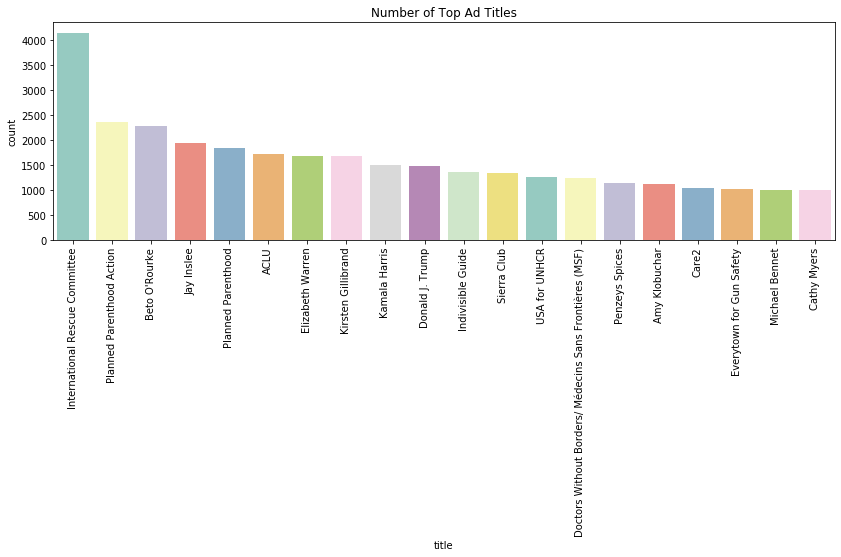

In [36]:
plot_count('title','Top Ad Titles', text_fb, 3.5)
#plt.title("Number of Top Ad Titles")

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129381 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127758 missing fr

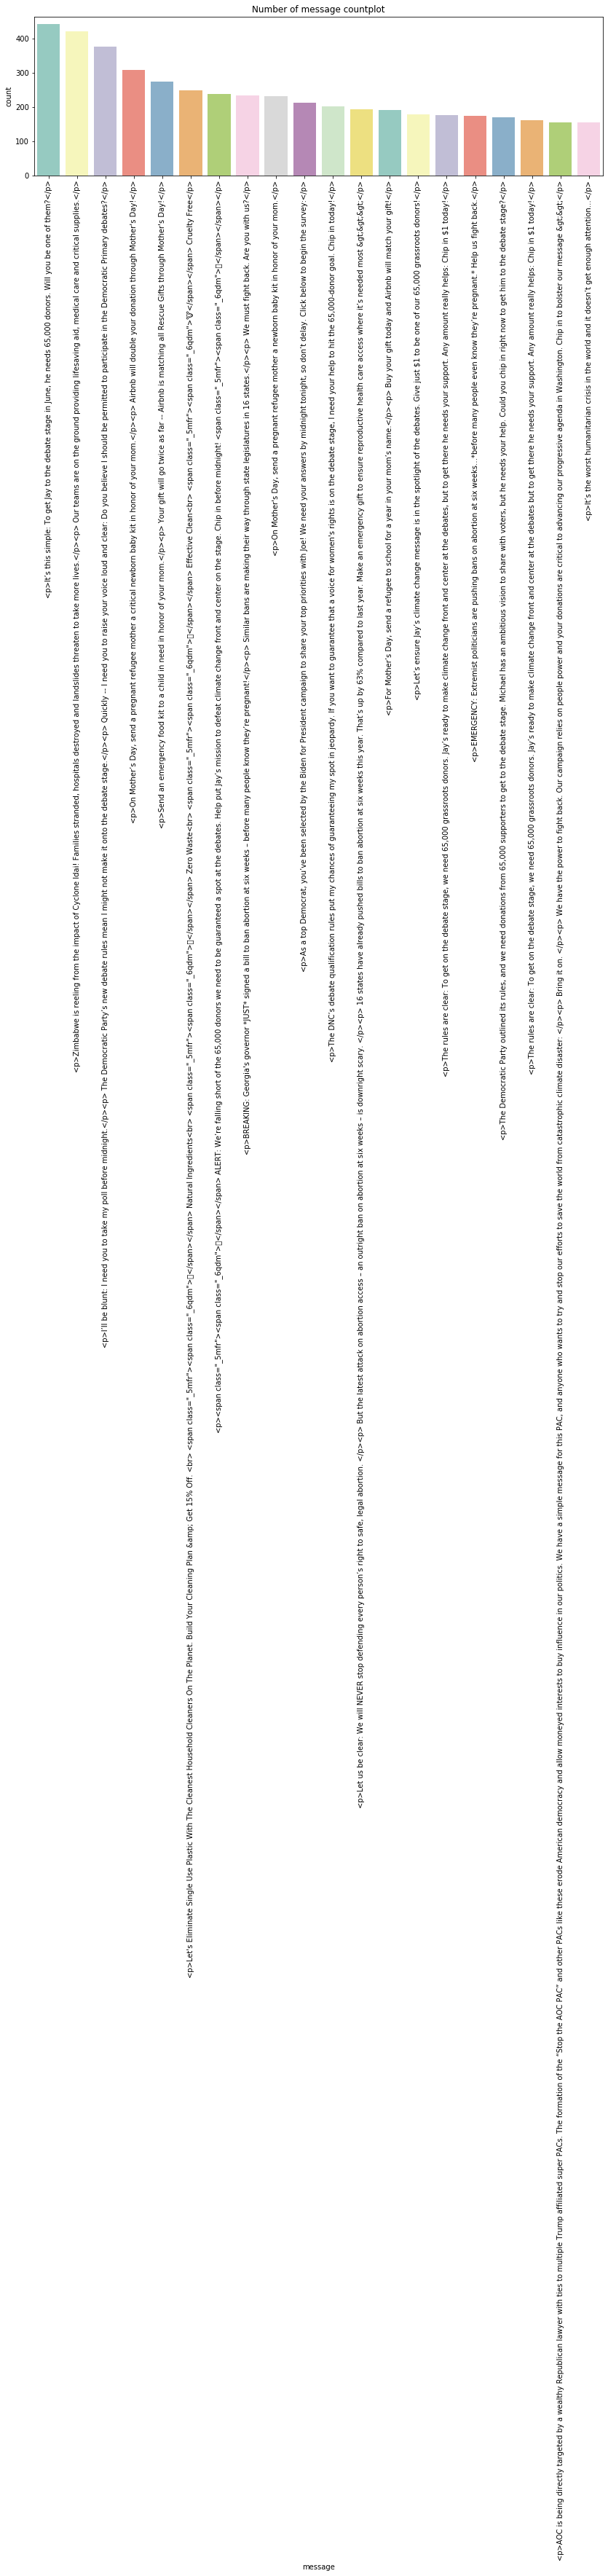

In [28]:
#Note the number (counts) of message.
plot_count('message','message countplot', text_fb, 3.5)